<a href="https://colab.research.google.com/github/ardioputra/Cyberbullying_Detection/blob/main/CyberbullyingDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submission 1

##Ardio Pratama Putra 



In [1]:
import pandas as pd
df = pd.read_csv('cyberbullying_tweets.csv')
df = df.rename(columns={'tweet_text':'text','cyberbullying_type':'label'})
df.head()

,text,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47692 non-null  object
 1   label   47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [3]:
df['label'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: label, dtype: int64

In [4]:
category = pd.get_dummies(df.label)
df_new = pd.concat([df, category],axis=1)
df_new = df_new.drop(columns='label')
df_new

,text,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
0,"In other words #katandandre, your food was cra...",0,0,0,1,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,1,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,1,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,1,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,1,0,0
...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",0,1,0,0,0,0
47688,Turner did not withhold his disappointment. Tu...,0,1,0,0,0,0
47689,I swear to God. This dumb nigger bitch. I have...,0,1,0,0,0,0
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,0,1,0,0,0,0


In [5]:
X = df_new.text.values
y = df_new[['age','ethnicity','gender','not_cyberbullying','other_cyberbullying','religion']].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=6000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

seks_train = tokenizer.texts_to_sequences(X_train)
seks_test = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(seks_train)
pad_test = pad_sequences(seks_test)

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=6000, output_dim=16),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          96000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 133,702
Trainable params: 133,702
Non-trainable params: 0
_________________________________________________________________


In [15]:
class StopEpoch(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAccuracy acquired above 90%")
      self.model.stop_training = True

stopepoch = StopEpoch()

In [16]:
hist = model.fit(pad_train, y_train, epochs=30,
                 callbacks=[stopepoch],
                 validation_data=(pad_test, y_test), 
                 verbose=2)

Epoch 1/30
1193/1193 - 477s - loss: 0.7698 - accuracy: 0.6620 - val_loss: 0.4637 - val_accuracy: 0.8056 - 477s/epoch - 400ms/step
Epoch 2/30
1193/1193 - 469s - loss: 0.4171 - accuracy: 0.8183 - val_loss: 0.4154 - val_accuracy: 0.8271 - 469s/epoch - 393ms/step
Epoch 3/30
1193/1193 - 470s - loss: 0.3609 - accuracy: 0.8478 - val_loss: 0.4349 - val_accuracy: 0.8148 - 470s/epoch - 394ms/step
Epoch 4/30
1193/1193 - 467s - loss: 0.3271 - accuracy: 0.8628 - val_loss: 0.4227 - val_accuracy: 0.8345 - 467s/epoch - 392ms/step
Epoch 5/30
1193/1193 - 470s - loss: 0.2969 - accuracy: 0.8755 - val_loss: 0.4440 - val_accuracy: 0.8320 - 470s/epoch - 394ms/step
Epoch 6/30
1193/1193 - 468s - loss: 0.2751 - accuracy: 0.8878 - val_loss: 0.5777 - val_accuracy: 0.7932 - 468s/epoch - 392ms/step
Epoch 7/30
1193/1193 - 470s - loss: 0.2546 - accuracy: 0.8950 - val_loss: 0.4689 - val_accuracy: 0.8359 - 470s/epoch - 394ms/step
Epoch 8/30

Accuracy acquired above 90%
1193/1193 - 470s - loss: 0.2305 - accuracy: 0.9046

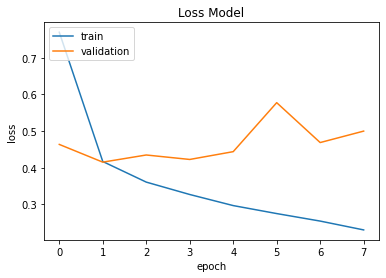

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

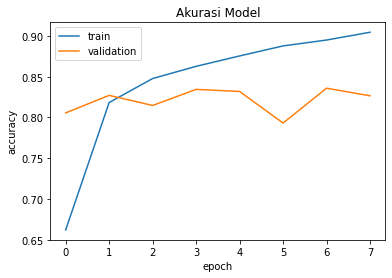

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()